In [3]:
import numpy as np 
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization # to find the optimized sharpe ratio


In [33]:
#stocks we are going to handle
stocks=['AAPL','WMT','TSLA','GE','AMZN','DB']
#historical data - start and end dates
start='2012-01-01'
end='2017-01-01'

#on an average there are 252 trading days in a year
NUM_TRADING_DAYS=252
#number of portfolios we need to generate( through different weights)
NUM_PORTFOLIOS=10000

def download_data():
    #key= stock_name and stock values(2010-2017) as values
    stock_data={}
    for stock in stocks:
        ticker=yf.Ticker(stock)#this will create the stock name as object 
        #stock_data[stock]=stock.history(start=start, end=end)['Close'] str doesnot have history function therefore need to create it as object
        stock_data[stock]=ticker.history(start=start, end=end)['Close']# satring date is inclusive ending date nor inclusive
    return pd.DataFrame(stock_data)
def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()    

def calculate_return(data):
    #aas we can see the ge stocks have high volatility as camapared to others therfore daily is going to be high positive or large negative whereas other will have small values for daily returns
    #log return provide NORMALIZATION-to measure all the variables in comparitive metric
    
    log_return=np.log(data/data.shift(1))
    return(log_return)[1:]
def show_statistics(returns):
    #instead of the dailymetrics we are after annual metrics
    # mean of the annual returns
    print(returns.mean()*NUM_TRADING_DAYS)
    print(returns.cov()*NUM_TRADING_DAYS)
    print(type(returns.cov()*NUM_TRADING_DAYS))
    

def show_mean_varience(returns,weights):
    #instead of the dailymetrics we are after annual metricrint(returns.cov()*NUM_TRADING_DAYS)s
    # mean of the annual returns
    portfolio_returns=np.sum(returns.mean()*weights)*NUM_TRADING_DAYS
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*NUM_TRADING_DAYS,weights)))
    
    print("expected protfoilio mean(return)",portfolio_returns)
    print("expected protfoilio volaitlity(standard deviation)",portfolio_volatility)
    
def show_portfolios1(means,risks):
    plt.figure(figsize=(10,6))
    plt.scatter(risks,means,c=means/risks,marker="o")
    plt.grid(True)
    plt.xlabel("expected volatility")
    plt.ylabel("Expected returns")
    plt.colorbar(label='sharpe ratio')
    plt.show()

def generate_portfolios(returns):
    
    portfolios_means=[]
    portfolios_risks=[]
    portfolios_weights=[]
    
    for _ in range(NUM_PORTFOLIOS):
        w=np.random.random(len(stocks))
        w/=np.sum(w)
        portfolios_weights.append(w)
        portfolios_means.append(np.sum(returns.mean()*w)*NUM_TRADING_DAYS)
        portfolios_risks.append(np.sqrt(np.dot(w.T,np.dot(returns.cov()*NUM_TRADING_DAYS,w))))
        
    return np.array(portfolios_weights),np.array(portfolios_means),np.array(portfolios_risks)


#optimization
def statistics(returns, weights):
    portfolio_returns=np.sum(returns.mean()*weights)*NUM_TRADING_DAYS
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*NUM_TRADING_DAYS,weights)))
    return np.array([portfolio_returns,portfolio_volatility,portfolio_returns/portfolio_volatility])

#spicy optimize function can find the minimum of the fun
# minimum of -f (x) in maximum of f(x)
def min_function_sharp(weights,returns):
    return -statistics(returns,weights)[2]
#f(x)=0 is the function we need to minimize
def optimize_function(weights , returns):
    #sum of the weights is equal to 1
    #np.sum(x)-1=0
    cons={'type':'eq','fun': lambda x:np.sum(x)-1}
    #weights can be atmost 1 when 100% of the mney is invested in one stock
    bounds=tuple((0,1) for _ in range(len(stocks)) )
    return optimization.minimize(fun=min_function_sharpe ,x0=weights[0],args=returns,method='SLSQP' ,bounds=bounds, constraints=cons)

def print_optimal_portfolio(optimum,returns):
    print("optimum portfolio",optimum['x'])
    print("optimum returns volatility,sharpe_ratio=",statistics(returns,optimum['x'].round(3)))
def show_portfolios(optimum,returns,means,risks):
    plt.figure(figsize=(10,6))
    plt.scatter(risks,means,c=means/risks,marker="o")
    plt.grid(True)
    plt.xlabel("expected volatility")
    plt.ylabel("Expected returns")
    plt.colorbar(label='sharpe ratio')
    plt.plot(statistics(returns,optimum['x'])[1],statistics(returns,optimum['x'])[0],marker='*',markersize=15)
    plt.show()
  
    

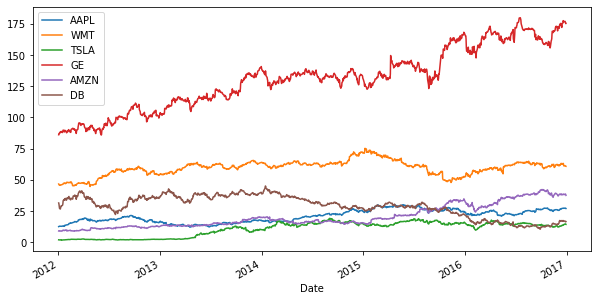

AAPL    0.154803
WMT     0.053214
TSLA    0.406862
GE      0.142554
AMZN    0.287153
DB     -0.128913
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.068351  0.008142  0.025434  0.014196  0.019009  0.024571
WMT   0.008142  0.028017  0.010265  0.009221  0.008545  0.013247
TSLA  0.025434  0.010265  0.252700  0.019334  0.041774  0.039047
GE    0.014196  0.009221  0.019334  0.032647  0.018026  0.031347
AMZN  0.019009  0.008545  0.041774  0.018026  0.094476  0.031574
DB    0.024571  0.013247  0.039047  0.031347  0.031574  0.139114
<class 'pandas.core.frame.DataFrame'>


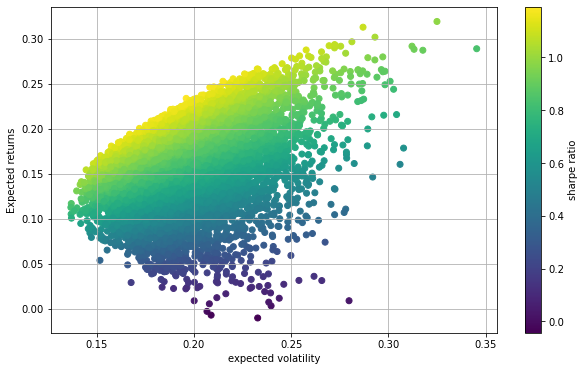

In [34]:
if __name__=="__main__":
    dataset=download_data()
    show_data(dataset) #line graph od all stocks
    log_returns=calculate_return(dataset)
    show_statistics(log_returns)
    pweight,means,risks=generate_portfolios(log_returns)
    show_portfolios1(means ,risks)

In [22]:
optimum=optimize_function(pweight,log_returns)


optimum portfolio [1.39243987e-01 0.00000000e+00 1.65929694e-01 3.73716192e-01
 3.21110128e-01 4.35849273e-16]
optimum returns volatility,sharpe_ratio= [0.23454809 0.19522413 1.20142978]


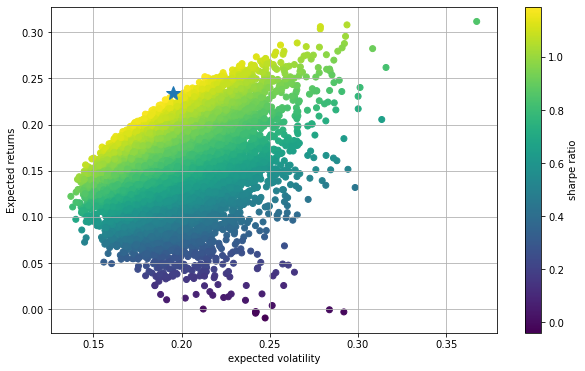

In [40]:
print_optimal_portfolio(optimum,log_returns)
show_portfolios(optimum,log_returns,means ,risks)